<a href="https://colab.research.google.com/github/rkhiar/IA/blob/master/Model_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## The  K-fold cross-validation
\\

K-fold cross-validation is an algoritmic technique used mainly to validate a modele prediction accuracy. 

It is considered as a much better alternative to **split_test_train** method (sklearn.model_selection.train_test_split) which allows to split a dataset into train_data an test_data samples, train on train_data and test on test_data. \\

the  K-fold cross-validation do almost the same but with an iterating process, changing train/test data in each iteration.

### Steps for K-fold cross-validation :


1.   Split the dataset into K equal partitions (or "folds").
2.   Use fold 1 as the testing set and the union of the other folds as the training set.
3.   Calculate testing accuracy.
4.   Repeat steps 2 and 3 K times, using a different fold as the testing set each time.
5.   Use the average testing accuracy as the estimate of out-of-sample accuracy.


\\
### Use cases  :
K-fold cross-validation is used for :

*   **Parameters tunning **:  pick from a dataset the best samples to learn from.
*   **Model selection** : select the model that suits the best a dataset 
*   **Features selection** : select the main features for learning 

\\


#### Parameters tunning (Hyperparameters)

Searching for the best sample of data to learn from :

(569, 30)
#################################
Cross Validation Process
#################################
Score matrix for each Fold analyse
[0.94827586 0.9137931  0.92982456 0.94736842 0.96491228 0.96491228
 0.94736842 0.94642857 0.96428571 0.96428571]
Score mean
0.9491454930429521
---------------------------------------------------------------------------------------------------------------
 Searching for the best sample of data to learn from . it is called Tunning parameters or hyperparameters: 
------------------------------------------------------------------------------------------------------------------
##############################
range/score matrix
##############################
Range [0-50] ---->  Score 0.9266666666666665
Range [50-100] ---->  Score 0.8833333333333334
Range [100-150] ---->  Score 0.9349999999999999
Range [150-200] ---->  Score 0.9200000000000002
Range [200-250] ---->  Score 0.8800000000000001
Range [250-300] ---->  Score 0.9349999999999999
Range [300-350] ---

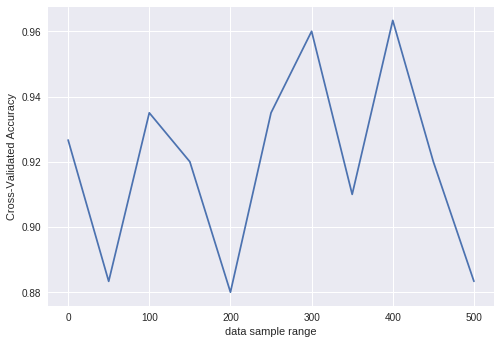

In [0]:
######################################################################"
# Cross Validation application on load_breast_cancer dataset
# Hyperparameters selection
# ####################################################################
#
# The logistique regression is shortly written and not commented. 
# See sklea logistic regression part for more details
#
# 
#
######################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


# Disable Warnings ##################"
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
#####################################
    

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()




#DataFrame creation whith load_breast_cancer data
canc = pd.DataFrame(cancer.data, columns=cancer.feature_names)
# Diagnostic column creation on DataFrame canc
canc['diagnostic']=cancer.target
#  X and y matrices construction
y=canc['diagnostic']
X = canc.drop('diagnostic', axis = 1)

# Logistic Regression class Instantiation
logReg = LogisticRegression()


###########################################################
#### Cross Validation 
##########################################################

print("""#################################""")
print("""Cross Validation Process""")
print("""#################################""")
      
  
# 10-fold cross-validation  on a classification model
scores = cross_val_score(logReg, X, y, cv=10, scoring='accuracy')
print("""Score matrix for each Fold analyse""")
print(scores)
print("""Score mean""")
print(scores.mean())




# Searching for the best sample of data to learn from. it is called Tunning parameters or hyperparameters
print("---------------------------------------------------------------------------------------------------------------")
print(""" Searching for the best sample of data to learn from . it is called Tunning parameters or hyperparameters: """)
print("------------------------------------------------------------------------------------------------------------------")

data_sample_range = list(range(50, 596, 50))
s_scores = []
for s in data_sample_range:       
    scores = cross_val_score(logReg, X.iloc[s-50:s+1,:], y[s-50:s+1], cv=10, scoring='accuracy')
    s_scores.append(scores.mean())


# Begin/end data range list contruction
end_range=[]
i=0 
while i<len(data_sample_range):
    data_sample_range[i]-=50
    end_range.append(data_sample_range[i]+50)
    i+=1
    


# Associate a range with its mean score
a_plot=zip(data_sample_range, end_range, s_scores)


# plotting score evolution according the data_sample_range choosen
plt.plot(data_sample_range, s_scores)
plt.xlabel('data sample range')
plt.ylabel('Cross-Validated Accuracy')


print("##############################")
print("range/score matrix")
print("##############################")
      
for elt, gs , sc in a_plot:
    print("Range [{0}-{1}] ---->  Score {2}".format(elt, gs, sc))



* We can clairly see that the classification model learn the best on samples [300-350] and [400-450]

\\

### Model selection :

Searching for the best learning model.

In [1]:
######################################################################"
# Cross Validation application on load_breast_cancer dataset
# Model selection
# ####################################################################
#
# The logistique regression is shortly written and not commented. 
# See sklea logistic regression part for more details
#
######################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



# Disable Warnings ##################"
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
#####################################
    

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


#DataFrame creation whith load_breast_cancer data
canc = pd.DataFrame(cancer.data, columns=cancer.feature_names)
# Diagnostic column creation on DataFrame canc
canc['diagnostic']=cancer.target
#  X and y matrices construction
y=canc['diagnostic']
X = canc.drop('diagnostic', axis = 1)


# Logistic Regression class Instantiation
logReg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)


###########################################################
#### Cross Validation 
##########################################################

print("""#################################""")
print("""KNN Cross Validation Process""")
print("""#################################""")
      
# 10-fold cross-validation  on a classification model
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print("""Score matrix for each Fold analyse""")
print(scores)
print("""Score mean""")
print(scores.mean())




print("""#############################################""")
print("""Logistic Regression Cross Validation Process""")
print("""#############################################""")
        
# 10-fold cross-validation  on a classification model
scores = cross_val_score(logReg, X, y, cv=10, scoring='accuracy')
print("""Score matrix for each Fold analyse""")
print(scores)
print("""Score mean""")
print(scores.mean())



#################################
KNN Cross Validation Process
#################################
Score matrix for each Fold analyse
[0.9137931  0.87931034 0.89473684 0.96491228 0.94736842 0.92982456
 0.96491228 0.92857143 0.91071429 0.96428571]
Score mean
0.9298429262812202
#############################################
Logistic Regression Cross Validation Process
#############################################
Score matrix for each Fold analyse
[0.94827586 0.9137931  0.92982456 0.94736842 0.96491228 0.96491228
 0.94736842 0.94642857 0.96428571 0.96428571]
Score mean
0.9491454930429521


### Feature selection :

Searching for the mot relevent features to learn from

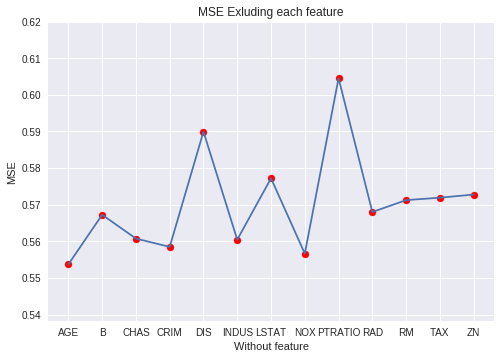

In [3]:

######################################################################"
# Cross Validation application on linear regression model 
# load_boston dataset
# Feature selection
# ####################################################################
#
# The linear regression is shortly written and not commented. 
# See sklearn linear regression part for more details
#
######################################################################



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



from sklearn.datasets import load_boston
boston = load_boston()



#DataFrame creation whith boston data
bos = pd.DataFrame(boston.data, columns=boston.feature_names)

# DataFrame append with targer values 'PRICES'
bos['PRICE']=boston.target

# X and y martices creation 
y=bos['PRICE']

# LinearRegression class Instantiation
lm = LinearRegression()

#print(len(boston.feature_names))

X_plot=[]
y_plot=[]
i=0

while i<len(boston.feature_names):
    X = bos.drop('PRICE', axis = 1)
    Xi = X.drop(X.columns[i], axis = 1)
        
    # Normalized root MSE Calculation 
    NRmse=np.sqrt(-cross_val_score(lm, Xi, y, cv=10, scoring='neg_mean_squared_error')).mean() / np.std(y, axis=0)
         
    X_plot.append(X.columns[i])
    y_plot.append(NRmse)      
      
    i+=1

    
X_plot2, y_plot2=zip(*sorted(zip(X_plot, y_plot), key=lambda x: x[0]))


# Plotting the results
plt.scatter(X_plot, y_plot, color='red', marker='o')
plt.plot(X_plot2, y_plot2)
plt.xlabel("Without feature")
plt.ylabel("MSE")
plt.title("MSE Exluding each feature")
plt.show()



We can see that the linear model learn the best without feature AGE